In [14]:
#Approach:
#Data Collection & Exploration:
import pandas as pd

# The full path to your file. The 'r' before the string is important.
file_path = r'C:\Users\Admin\Desktop\Guvi Live Session\Guvi Projects\Project 04\NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

# --- 1. Load the dataset ---
try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")

    # --- 2. Inspect its structure and contents ---

    # Display the first 5 rows to see the content
    print("\n----------- First 5 Rows -----------")
    print(df.head())

    # Display the structure (columns, data types, memory usage)
    print("\n----------- Dataset Structure & Info -----------")
    df.info()

    # Display the dimensions (number of rows and columns)
    # [cite_start]The project PDF mentions 7787 entries and 12 columns[cite: 75]. Let's verify.
    print("\n----------- Dataset Dimensions (Rows, Columns) -----------")
    print(df.shape)

except FileNotFoundError:
    print("ERROR: File not found. Please make sure 'netflix_titles.csv' is in the 'Project 04' folder.")

Dataset loaded successfully!

----------- First 5 Rows -----------
  show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 

In [15]:
# This single cell will identify missing values, duplicates, and inconsistencies.

# 1. Identifying Missing Values
print("----------- Count of Missing Values -----------")
missing_values = df.isnull().sum()
# This will only show columns that actually have missing values
print(missing_values[missing_values > 0])

# 2. Identifying Duplicate Records
print("\n----------- Count of Duplicate Records -----------")
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate records found: {duplicate_count}")

# 3. Identifying Inconsistencies in Categorical Values
print("\n----------- Unique Values in 'rating' Column -----------")
print(df['rating'].value_counts())

----------- Count of Missing Values -----------
director      2389
cast           718
country        507
date_added      10
rating           7
dtype: int64

----------- Count of Duplicate Records -----------
Number of duplicate records found: 0

----------- Unique Values in 'rating' Column -----------
rating
TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\4124098837.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


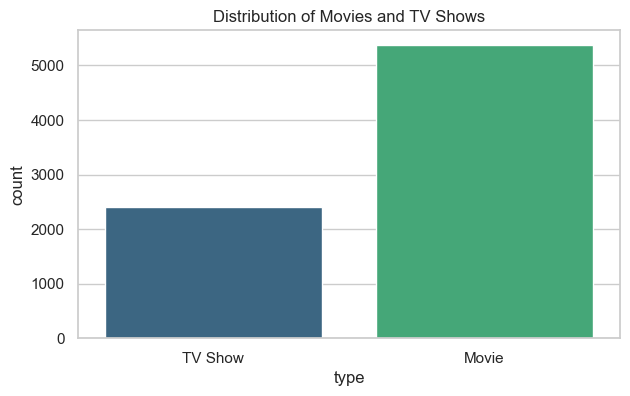

C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\4124098837.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')


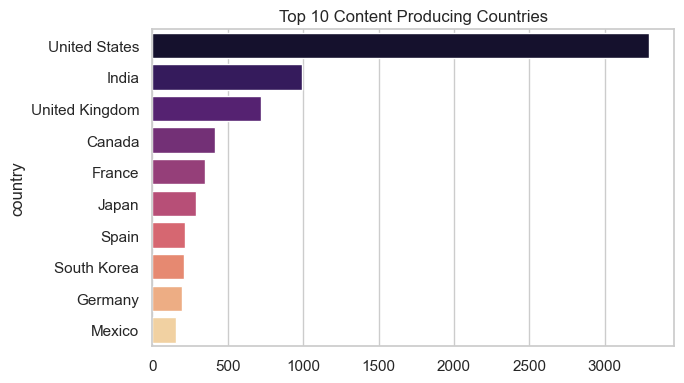

C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\4124098837.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')


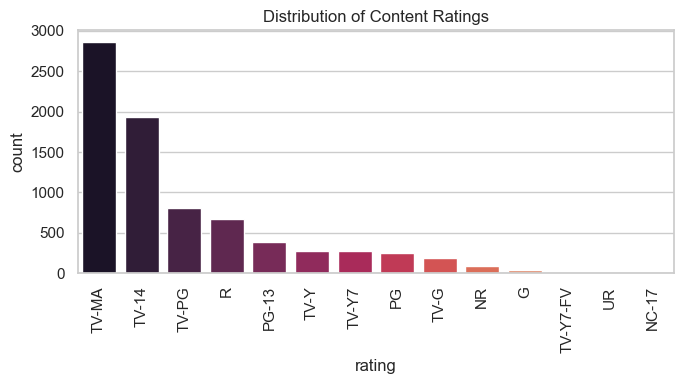

C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\4124098837.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cubehelix')


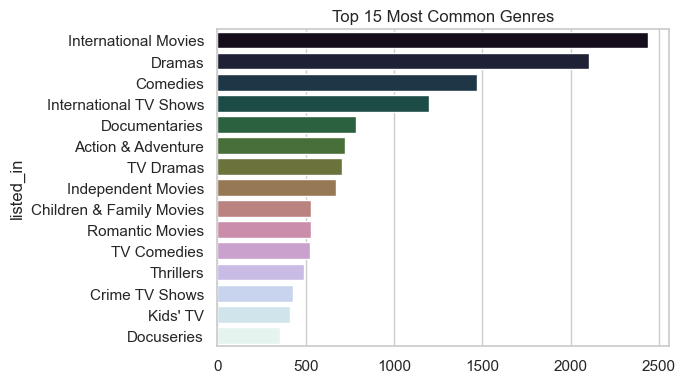

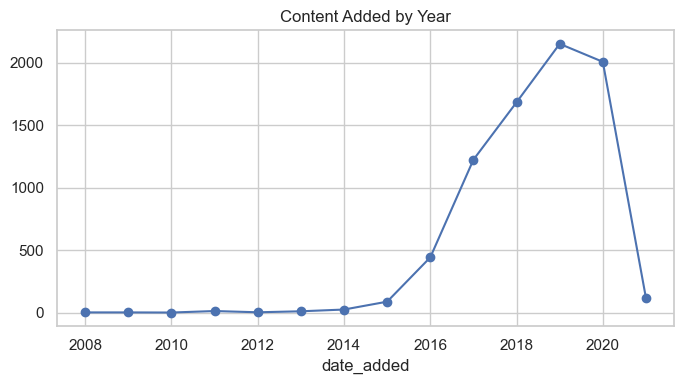

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set a general style for the plots
sns.set_style("whitegrid")

# --- We will use a smaller figsize for all visualizations ---
small_figsize = (7, 4)

# --- Plot 1: Distribution of Content Type ---
plt.figure(figsize=small_figsize)
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Distribution of Movies and TV Shows')
plt.show()

# --- Plot 2: Top 10 Countries with the Most Content ---
plt.figure(figsize=small_figsize)
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='magma')
plt.title('Top 10 Content Producing Countries')
plt.tight_layout()
plt.show()

# --- Plot 3: Distribution of Content Ratings ---
plt.figure(figsize=small_figsize)
sns.countplot(x='rating', data=df, order=df['rating'].value_counts().index, palette='rocket')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=90) # Rotate labels to prevent overlap
plt.tight_layout()
plt.show()

# --- Plot 4: Top 15 Most Common Genres ---
plt.figure(figsize=small_figsize)
genre_counts = df['listed_in'].str.split(', ').explode().value_counts().head(15)
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='cubehelix')
plt.title('Top 15 Most Common Genres')
plt.tight_layout()
plt.show()

# --- Plot 5: Content Added Over the Years ---
plt.figure(figsize=small_figsize)
# FIX: Removed .str.strip() to prevent the error.
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
content_by_year = df['date_added'].dt.year.value_counts().sort_index()
content_by_year.plot(kind='line', marker='o', linestyle='-')
plt.title('Content Added by Year')
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
## Step 2: Data Preprocessing 🛠️
# Import all necessary libraries for this stage
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# ==============================================================================
# Step 1: Handle missing values in key columns by using imputation strategies
# ==============================================================================
print("--- Step 1: Handling Missing Values ---")
# For text-based columns, we fill missing values with the placeholder 'Unknown'
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# For the 'rating' column, we fill missing values with the most frequent rating (the mode)
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

# For 'date_added', since there are very few missing, we remove those rows
df.dropna(subset=['date_added'], inplace=True)
print("Missing values handled.")


# ==============================================================================
# Step 2: Clean and Convert Helper Columns
# This is a prerequisite before the main feature engineering
# ==============================================================================
print("\n--- Step 2: Cleaning Helper Columns ---")
# Convert 'date_added' to a proper datetime format
df['date_added'] = pd.to_datetime(df['date_added'])

# Clean the 'duration' column to create a numerical version
df['duration_numeric'] = df['duration'].apply(lambda x: int(x.split()[0]))
print("Cleaned 'duration' and 'date_added' columns.")


# ==============================================================================
# Step 3: Final Feature Engineering
# ==============================================================================
print("\n--- Step 3: Performing Final Feature Engineering ---")

# --- 3a. Standardize numerical features (duration and release_year) ---
print("   - Standardizing numerical features...")
numerical_features = df[['release_year', 'duration_numeric']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# --- 3b. Convert categorical data (type, rating) using one-hot encoding ---
print("   - One-hot encoding categorical features...")
categorical_features = pd.get_dummies(df[['type', 'rating']], drop_first=True)

# --- 3c. Extract features from text columns (listed_in, description, etc.) using TF-IDF ---
print("   - Vectorizing text features with TF-IDF...")
# We combine all relevant text into a single 'soup' for a rich representation
df['feature_soup'] = df['listed_in'] + ' ' + df['description'] + ' ' + df['title'] + ' ' + df['director']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['feature_soup'])


# ==============================================================================
# Step 4: Combine all processed features into a single matrix
# ==============================================================================
print("\n--- Step 4: Combining All Features ---")
# We stack all our processed features horizontally to create the final matrix
features_matrix = hstack([
    tfidf_matrix,
    scaled_numerical_features,
    categorical_features
])
print("All features combined into the final matrix.")


# ==============================================================================
# Step 5: Verify the final result
# ==============================================================================
print("\n--- PREPROCESSING AND FEATURE ENGINEERING COMPLETE ---")
print(f"The shape of our final features matrix is: {features_matrix.shape}")

--- Step 1: Handling Missing Values ---
Missing values handled.

--- Step 2: Cleaning Helper Columns ---
Cleaned 'duration' and 'date_added' columns.

--- Step 3: Performing Final Feature Engineering ---
   - Standardizing numerical features...
   - One-hot encoding categorical features...
   - Vectorizing text features with TF-IDF...


C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\2356426780.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_1204\2356426780.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp


--- Step 4: Combining All Features ---
All features combined into the final matrix.

--- PREPROCESSING AND FEATURE ENGINEERING COMPLETE ---
The shape of our final features matrix is: (7777, 5016)


In [23]:
#3. Feature Engineering:
# Import all necessary libraries for this stage
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack

# ==============================================================================
# Step 1: Create new meaningful features as per the project plan
# ==============================================================================
print("--- Step 1: Creating Custom Features ---")

# Command: Create 'content_age' feature
# This is the current year minus the release year.
current_year = pd.to_datetime('today').year
df['content_age'] = current_year - df['release_year']

# Command: Create 'genre_count' feature
# This counts the number of genres listed for each title.
df['genre_count'] = df['listed_in'].apply(lambda x: len(x.split(',')))

print("Successfully created 'content_age' and 'genre_count' features.")


# ==============================================================================
# Step 2: Convert all data into a final numerical matrix
# ==============================================================================
print("\n--- Step 2: Building Final Feature Matrix ---")

# --- 2a. Standardize numerical features (now including our new features) ---
print("   - Command: Standardizing numerical features with StandardScaler...")
# We now include content_age and genre_count in our list of numerical features
numerical_features = df[['release_year', 'duration_numeric', 'content_age', 'genre_count']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

# --- 2b. Convert categorical data using One-Hot Encoding ---
print("   - Command: Converting categorical features with pd.get_dummies...")
categorical_features = pd.get_dummies(df[['type', 'rating']], drop_first=True)

# --- 2c. Extract text features using TF-IDF Vectorization ---
print("   - Command: Vectorizing text features with TfidfVectorizer...")
# We combine all relevant text into a single 'soup' for a rich representation
df['feature_soup'] = df['listed_in'] + ' ' + df['description'] + ' ' + df['title'] + ' ' + df['director']
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(df['feature_soup'])


# ==============================================================================
# Step 3: Combine all processed features into a single matrix
# ==============================================================================
print("\n--- Step 3: Combining All Features ---")
# Command: Horizontally stack all feature matrices
features_matrix = hstack([
    tfidf_matrix,
    scaled_numerical_features,
    categorical_features
])
print("All features successfully combined into the final matrix.")


# ==============================================================================
# Step 4: Verify the final result
# ==============================================================================
print("\n--- FEATURE ENGINEERING COMPLETE ---")
print(f"The shape of our final features matrix is: {features_matrix.shape}")

--- Step 1: Creating Custom Features ---
Successfully created 'content_age' and 'genre_count' features.

--- Step 2: Building Final Feature Matrix ---
   - Command: Standardizing numerical features with StandardScaler...
   - Command: Converting categorical features with pd.get_dummies...
   - Command: Vectorizing text features with TfidfVectorizer...

--- Step 3: Combining All Features ---
All features successfully combined into the final matrix.

--- FEATURE ENGINEERING COMPLETE ---
The shape of our final features matrix is: (7777, 5018)


Calculating inertia for k values from 2 to 15...
Calculation complete.


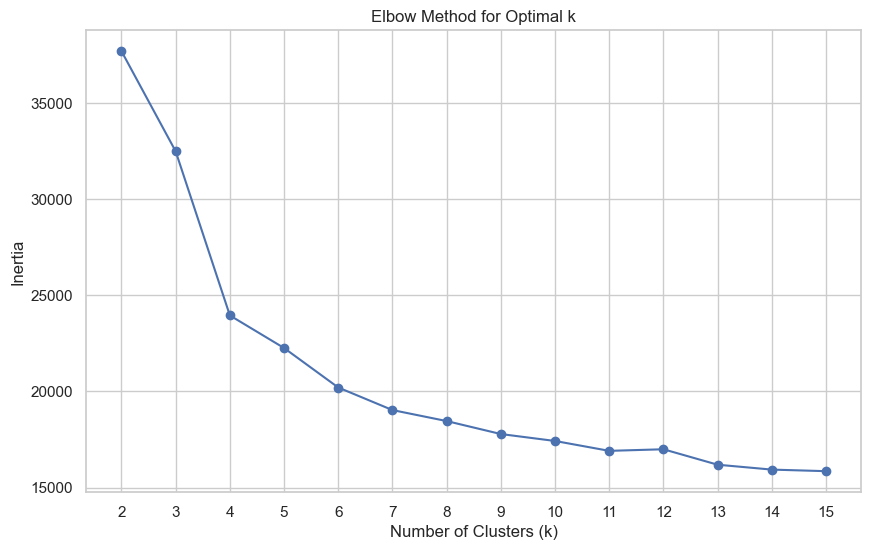

In [42]:
#Find Optimal k for K-Means (Elbow Method)
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# --- Find the Optimal Number of Clusters using the Elbow Method ---
k_range = range(2, 16)
inertia_values = []
print("Calculating inertia for k values from 2 to 15...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(features_matrix)
    inertia_values.append(kmeans.inertia_)
print("Calculation complete.")

# --- Plot the Elbow Curve ---
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_range)
plt.grid(True)
plt.show()

Reducing data dimensionality with PCA...
PCA complete.
Creating dendrogram from a sample of 1000 data points...


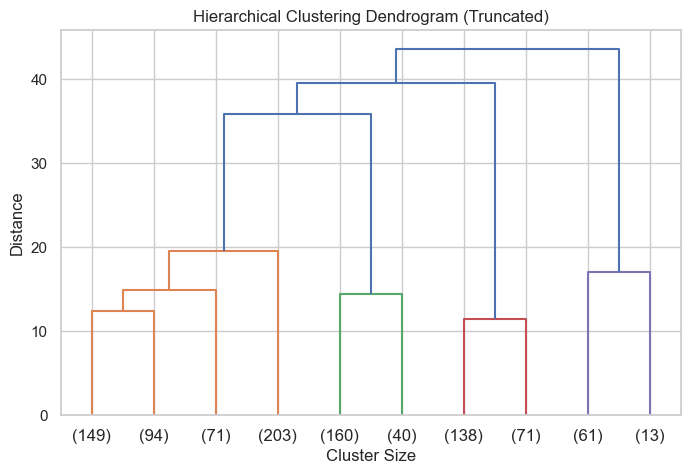

In [43]:
 #Prepare for Hierarchical & DBSCAN (PCA & Dendrogram)
# This is the correct code for preparing for Hierarchical Clustering and DBSCAN.
# Note: Lines starting with a '#' are comments and are ignored by Python.

from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# --- 1. Reduce Dimensionality with PCA ---
print("Reducing data dimensionality with PCA...")
pca = PCA(n_components=50)
features_pca = pca.fit_transform(features_matrix.toarray())
print("PCA complete.")

# --- 2. Create a Dendrogram on a Sample of the Data ---
print("Creating dendrogram from a sample of 1000 data points...")
sample_data = features_pca[:1000]
linked = linkage(sample_data, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True,
            truncate_mode='lastp',
            p=10,
            )
plt.title('Hierarchical Clustering Dendrogram (Truncated)')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()

Calculating k-distances to find optimal eps...


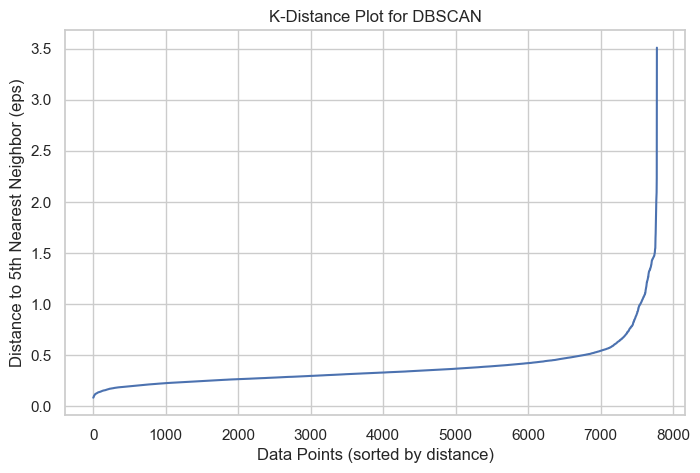

In [44]:
#Find Optimal eps for DBSCAN
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

# --- Find a good value for eps using NearestNeighbors ---
print("Calculating k-distances to find optimal eps...")
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(features_pca)
distances, indices = neighbors_fit.kneighbors(features_pca)
distances = np.sort(distances[:, 4])
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN')
plt.xlabel('Data Points (sorted by distance)')
plt.ylabel('Distance to 5th Nearest Neighbor (eps)')
plt.grid(True)
plt.show()

In [45]:
#Train All Models and Evaluate
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd
import numpy as np

# ==============================================================================
# --- 1. Train All Models using the Parameters Found Above ---
# ==============================================================================

# --- K-Means Model (using k=4) ---
print("Training K-Means model (k=4)...")
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
df['cluster'] = kmeans.fit_predict(features_matrix)
print("K-Means training complete.")

# --- Hierarchical Model (using k=4) ---
print("\nTraining Hierarchical Clustering model (k=4)...")
hierarchical_model = AgglomerativeClustering(n_clusters=4)
df['hierarchical_cluster'] = hierarchical_model.fit_predict(features_pca)
print("Hierarchical training complete.")

# --- DBSCAN Model (using eps=1.8) ---
print("\nTraining DBSCAN model (eps=1.8)...")
dbscan = DBSCAN(eps=1.8, min_samples=5)
df['dbscan_cluster'] = dbscan.fit_predict(features_pca)
print("DBSCAN training complete.")

# ==============================================================================
# --- 2. Evaluate All Models ---
# ==============================================================================
print("\n--- Model Evaluation Scores ---")
# Evaluate K-Means
kmeans_silhouette = silhouette_score(features_pca, df['cluster'])
kmeans_db_score = davies_bouldin_score(features_pca, df['cluster'])
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")
print(f"K-Means Davies-Bouldin Index: {kmeans_db_score:.4f}")
print("-" * 30)
# Evaluate Hierarchical
hierarchical_silhouette = silhouette_score(features_pca, df['hierarchical_cluster'])
hierarchical_db_score = davies_bouldin_score(features_pca, df['hierarchical_cluster'])
print(f"Hierarchical Silhouette Score: {hierarchical_silhouette:.4f}")
print(f"Hierarchical Davies-Bouldin Index: {hierarchical_db_score:.4f}")
print("-" * 30)
# Evaluate DBSCAN
dbscan_mask = df['dbscan_cluster'] != -1
if np.sum(dbscan_mask) > 0:
    dbscan_silhouette = silhouette_score(features_pca[dbscan_mask], df.loc[dbscan_mask, 'dbscan_cluster'])
    dbscan_db_score = davies_bouldin_score(features_pca[dbscan_mask], df.loc[dbscan_mask, 'dbscan_cluster'])
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
    print(f"DBSCAN Davies-Bouldin Index: {dbscan_db_score:.4f}")
else:
    print("DBSCAN resulted in only noise points.")

Training K-Means model (k=4)...
K-Means training complete.

Training Hierarchical Clustering model (k=4)...
Hierarchical training complete.

Training DBSCAN model (eps=1.8)...
DBSCAN training complete.

--- Model Evaluation Scores ---
K-Means Silhouette Score: 0.3086
K-Means Davies-Bouldin Index: 1.1145
------------------------------
Hierarchical Silhouette Score: 0.2597
Hierarchical Davies-Bouldin Index: 1.2444
------------------------------
DBSCAN Silhouette Score: 0.7425
DBSCAN Davies-Bouldin Index: 0.2686


Running t-SNE... This may take a few minutes.
t-SNE complete.


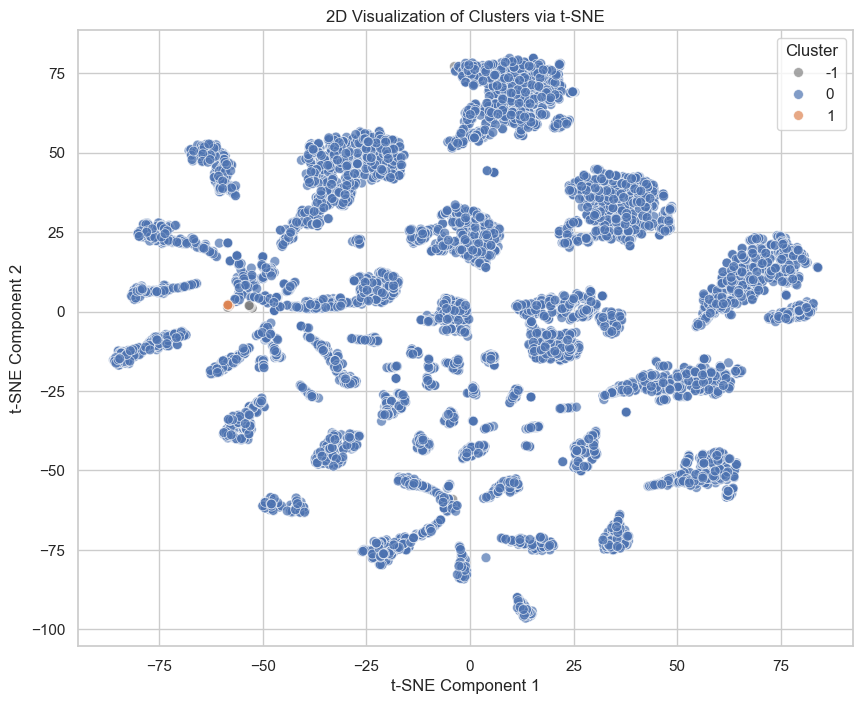

In [46]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# --- Reduce Dimensions with t-SNE ---
# We run t-SNE on our PCA-reduced data for efficiency
print("Running t-SNE... This may take a few minutes.")
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
features_tsne = tsne.fit_transform(features_pca)
print("t-SNE complete.")

# --- Visualize the DBSCAN Clusters using t-SNE components ---
# Create a DataFrame for easy plotting
tsne_df = pd.DataFrame(features_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['cluster'] = df['dbscan_cluster'].values

# Create a custom color palette to handle the -1 noise points
n_clusters = len(tsne_df['cluster'].unique()) - (1 if -1 in tsne_df['cluster'].unique() else 0)
palette = sns.color_palette('deep', n_colors=n_clusters)
color_map = {cluster_id: color for cluster_id, color in zip(range(n_clusters), palette)}
color_map[-1] = (0.5, 0.5, 0.5) # Grey for noise

plt.figure(figsize=(10, 8))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='cluster', data=tsne_df, palette=color_map, s=50, alpha=0.7)
plt.title('2D Visualization of Clusters via t-SNE')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

In [47]:
import pandas as pd

# --- Create Detailed Profiles for Each DBSCAN Cluster ---

# Get the unique cluster labels (excluding noise)
unique_clusters = sorted(df[df['dbscan_cluster'] != -1]['dbscan_cluster'].unique())

for cluster_id in unique_clusters:
    # Create a dataframe for just the current cluster
    cluster_df = df[df['dbscan_cluster'] == cluster_id]
    
    print(f"\n" + "="*40)
    print(f"--- CLUSTER {cluster_id} PROFILE ---")
    print(f"Number of items: {len(cluster_df)}")
    print("="*40)
    
    # --- Distribution of Content Ratings ---
    print("\nRating Distribution:")
    print(cluster_df['rating'].value_counts(normalize=True).head().apply(lambda x: f"{x:.0%}"))
    
    # --- Most Common Genres ---
    print("\nTop 5 Genres:")
    top_genres = cluster_df['listed_in'].str.split(', ').explode().value_counts().head(5)
    print(top_genres)


--- CLUSTER 0 PROFILE ---
Number of items: 7753

Rating Distribution:
rating
TV-MA    37%
TV-14    25%
TV-PG    10%
R         9%
PG-13     5%
Name: proportion, dtype: object

Top 5 Genres:
listed_in
International Movies      2436
Dramas                    2105
Comedies                  1471
International TV Shows    1196
Documentaries              773
Name: count, dtype: int64

--- CLUSTER 1 PROFILE ---
Number of items: 14

Rating Distribution:
rating
TV-14    50%
TV-PG    43%
TV-MA     7%
Name: proportion, dtype: object

Top 5 Genres:
listed_in
Documentaries     13
Classic Movies    11
TV Shows           1
Name: count, dtype: int64


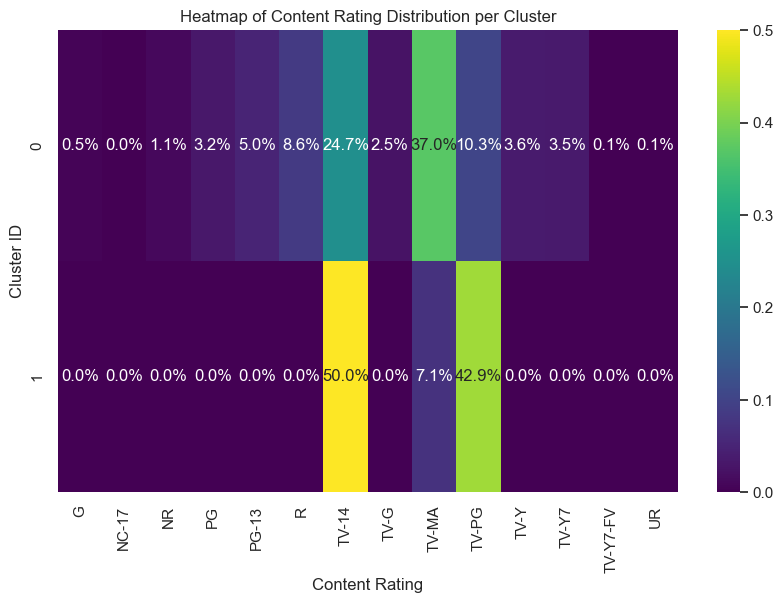

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# --- Create a Heatmap of Ratings vs. Clusters (Smaller) ---

# We need to exclude noise points for a meaningful heatmap
df_no_noise = df[df['dbscan_cluster'] != -1]

# Create a cross-tabulation of cluster and rating
ct = pd.crosstab(df_no_noise['dbscan_cluster'], df_no_noise['rating'], normalize='index')

# figsize changed to (10, 6) for a more compact plot
plt.figure(figsize=(10, 6))

sns.heatmap(ct, annot=True, fmt='.1%', cmap='viridis')
plt.title('Heatmap of Content Rating Distribution per Cluster')
plt.xlabel('Content Rating')
plt.ylabel('Cluster ID')
plt.show()